# Import neccessery libararies

In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import time 
import numpy as np

# Web Scraping from Amazon website
<h3>Since pulling the data from the site takes hours, we pulled the data once and exported it to a CSV file<h3>


In [ ]:
My_User_Agent  = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
headers = {
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': My_User_Agent,
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'referer': 'https://www.amazon.com/',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
}

options = webdriver.ChromeOptions()
options.add_argument("start-maximized")
options.add_argument("--log-level=3")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)
options.add_argument("--disable-blink-features=AutomationControlled")

# Driver Setting to notice. 
try:driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
except:driver = webdriver.Chrome()

# Looping Through Pages
listofdict = list()
Listing_count= 7000 
Listing_start = 1
Script_Break = False
Full_Break = False
pages = range(1,100)
for page in pages:
    if Full_Break == True:
        break

    driver.get('https://www.amazon.com/')
    time.sleep(2)
    Page_URL = f"https://www.amazon.com/s?i=electronics-intl-ship&bbn=16225009011&rh=n%3A16225009011%2Cn%3A541966&page={page}&qid=1709158259&ref=sr_pg_1"
    driver.get(Page_URL)
    time.sleep(3)

    response = driver.page_source
    soup = BeautifulSoup(response, "html.parser")

    Results = soup.find_all('div',class_='sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20')
    # Looping Through Each Product
    for data in Results:
        if Script_Break == True:
            Full_Break = True
            break

        try:
            Product_Link = data.find('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal').get('href')
            Full_Link = 'https://www.amazon.com' + Product_Link

            driver.get(Full_Link)
            time.sleep(2)

            Product_response = driver.page_source
            Product_Soup = BeautifulSoup(Product_response, "html.parser")

            #Getting Data 
            product_name = Product_Soup.find('span', id="productTitle").text.strip()
            product_price = Product_Soup.find('span', class_='aok-offscreen').text
            try:
                product_Description = Product_Soup.find('div', id='aplus').text.strip()
            except:
                product_Description = Product_Soup.find('div', id='apm-brand-story-carousel').text.strip()
            review_link = Product_Soup.find('a', class_='a-link-emphasis a-text-bold').get('href')
      
            review_url = 'https://www.amazon.com' + review_link
            driver.get(review_url)
            time.sleep(2)

            review_response = driver.page_source
            review_soup = BeautifulSoup(review_response, "html.parser")
            all_reviews = review_soup.find_all('div', class_='a-section review aok-relative')
            
            for review_data in all_reviews:
                datadict = dict()
                datadict['Product Name'] = product_name
                datadict['Product Price'] = product_price
                datadict['Product Description'] = product_Description
                datadict['Product ID'] = Full_Link.split('/')[5]
                datadict['Brand'] =review_soup.find('a', class_='a-size-base a-link-normal').text
                datadict['Rating'] =review_data.find('span', class_='a-icon-alt').text.split(' ')[0]
                datadict['Date'] =review_data.find('span', class_='a-size-base a-color-secondary review-date').text.split(' on ')[1]
                datadict['customer reviews'] =review_data.find('span', class_='a-size-base review-text review-text-content').text.strip()
                print(datadict)
                listofdict.append(datadict)
                print('Listing Number......', Listing_start)
                if Listing_start >= Listing_count:
                    Script_Break = True
                    break
                Listing_start = Listing_start+1
        except:
            pass

df = pd.DataFrame.from_dict(listofdict)
path = 'Amazon_Data.csv'
df.to_csv(path ,index=False)
print(f'Data Saved in {path}')


# Data Loading and Preprocessing


Reading data from CSV file and insert into a DataFrame

In [3]:
path = "C:/Users/rotes/Desktop/Amazon_Data.csv"
df = pd.read_csv(path)
print(df.head())

                                        Product Name Product Price  \
0  Amazon Basics Micro SDXC Memory Card with Full...      $17.92     
1  Amazon Basics Micro SDXC Memory Card with Full...      $17.92     
2  Amazon Basics Micro SDXC Memory Card with Full...      $17.92     
3  Amazon Basics Micro SDXC Memory Card with Full...      $17.92     
4  Amazon Basics Micro SDXC Memory Card with Full...      $17.92     

                                 Product Description  Product ID  \
0  From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...  B08TJRVWV1   
1  From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...  B08TJRVWV1   
2  From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...  B08TJRVWV1   
3  From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...  B08TJRVWV1   
4  From the brand \n\n\n\n\n\n\n\n\n\n \n\n\n\n\n...  B08TJRVWV1   

           Brand  Rating               Date  \
0  Amazon Basics     5.0  December 15, 2023   
1  Amazon Basics     5.0   February 8, 2024   
2  Amazon Basics     5.0    J

Dropping Null Values rows

*   Dropping Date column as its not Relevant
*   Removing new line varaible from Product Description
*   Removing dollar sign from Product Price
*   Converting Product Price from string to intger
*   Dropping Null Values rows after processing


---




In [4]:
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)
df['Product Description'] = df['Product Description'].str.replace('\n', '')
df['Product Price'] = df['Product Price'].str.replace('$', '')
df['Product Price'] = df['Product Price'].apply(lambda x: re.findall(r'\d+\.\d+', str(x)))
df['Product Price'] = df['Product Price'].apply(lambda x: float(x[0]) if len(x) > 0 else None)
df.dropna(inplace=True)


C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\62015198.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Product Price'] = df['Product Price'].str.replace('$', '')


Visualizing Segmentation by Brands

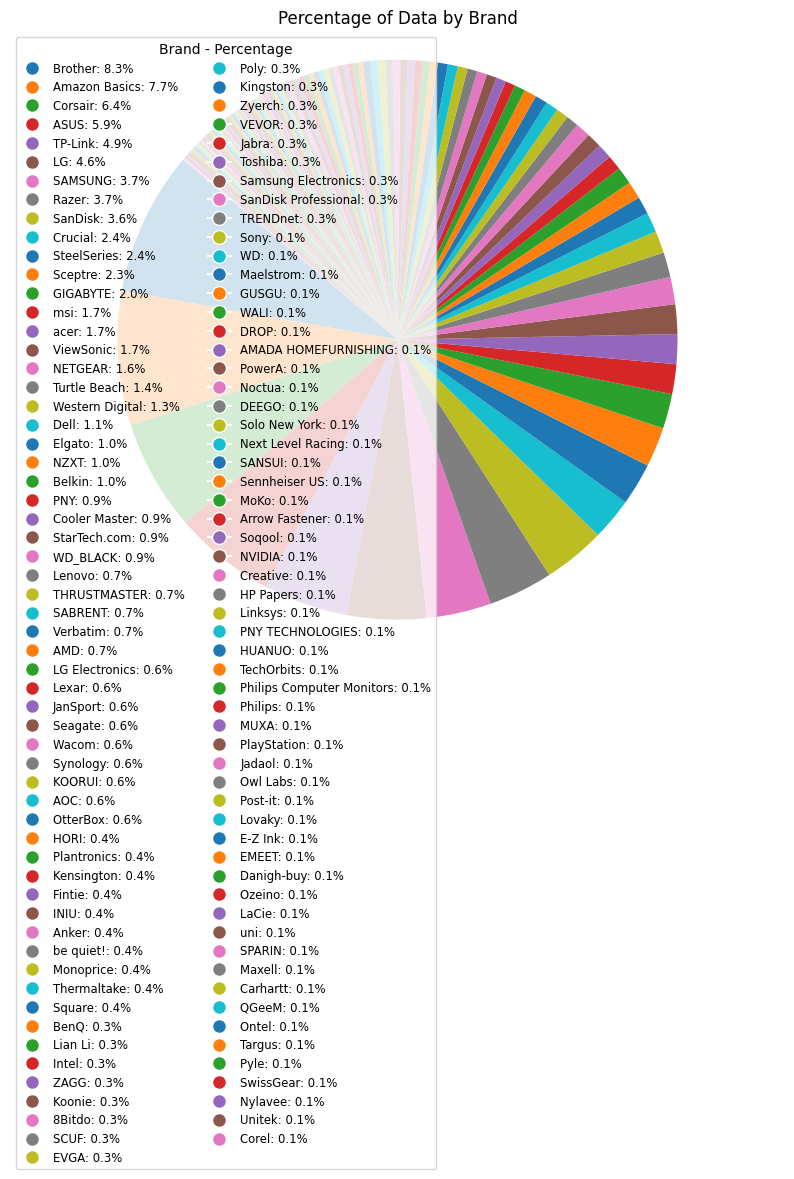

In [5]:
brand_counts = df['Brand'].value_counts()
percentages = brand_counts / len(df) * 100
plt.figure(figsize=(10, 8))
patches, _ = plt.pie(brand_counts, startangle=140)
plt.title('Percentage of Data by Brand')
plt.axis('equal')
legend_labels = [f'{brand}: {percent:.1f}%' for brand, percent in zip(brand_counts.index, percentages)]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}', markersize=10) for i in range(len(brand_counts))]
plt.legend(legend_handles, legend_labels, loc='upper left', fontsize='small', title='Brand - Percentage', ncol=2)
plt.show()

Relationship Between Brand and Rating

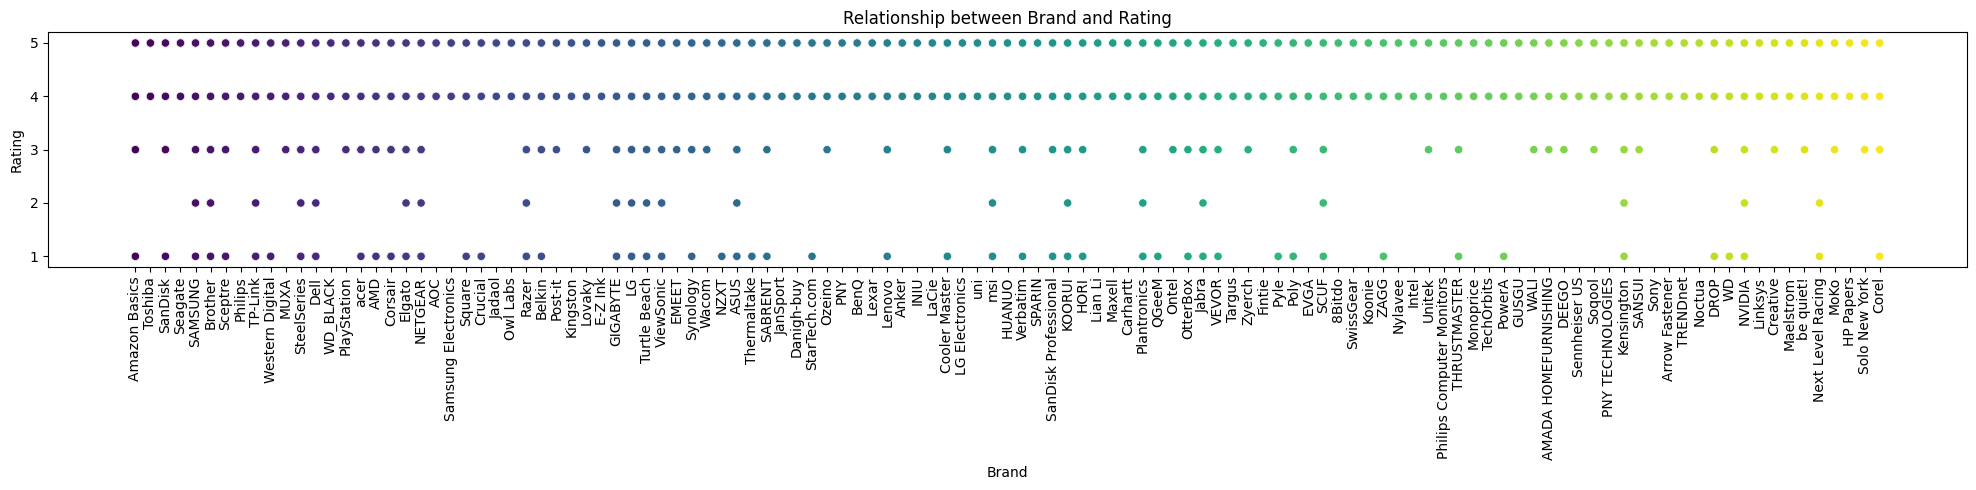

In [6]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Brand', y='Rating', hue='Brand', data=df, palette='viridis', legend=False)
plt.title('Relationship between Brand and Rating')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Applying TF-IDF method on


*   customer reivews
*   Product Descriptions
*   Product Name

to convert Text base data to meaningfull infromation



In [7]:
vectorizer = TfidfVectorizer()
text_col = ['customer reviews','Product Description','Product Name']
for col in text_col:
  X = vectorizer.fit_transform(df[col])
  tfidf_sum = X.sum(axis=1)
  df[col] = tfidf_sum

Applying Label Encoding on

* Brand
* Product ID

In [8]:
label_encoder = LabelEncoder()
columns = ['Brand','Product ID']
for col in columns:
  df[col] = label_encoder.fit_transform(df[col])

In [9]:
df.head(5)

,Product Name,Product Price,Product Description,Product ID,Brand,Rating,customer reviews
0,4.324424,17.92,3.01033,356,5,5.0,13.535235
1,4.324424,17.92,3.01033,356,5,5.0,2.869879
2,4.324424,17.92,3.01033,356,5,5.0,5.708801
3,4.324424,17.92,3.01033,356,5,4.0,9.419728
4,4.324424,17.92,3.01033,356,5,5.0,2.762242


Visualizing Distribution of each column on processed data

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


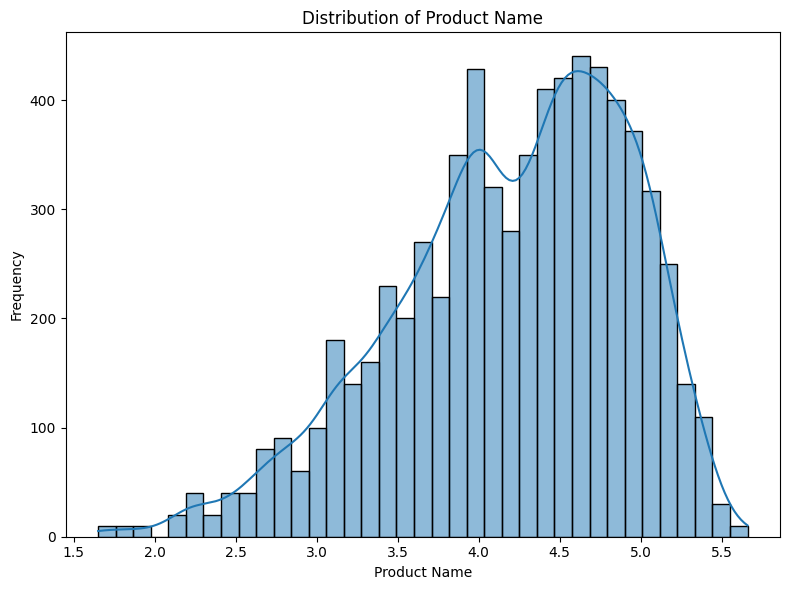

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


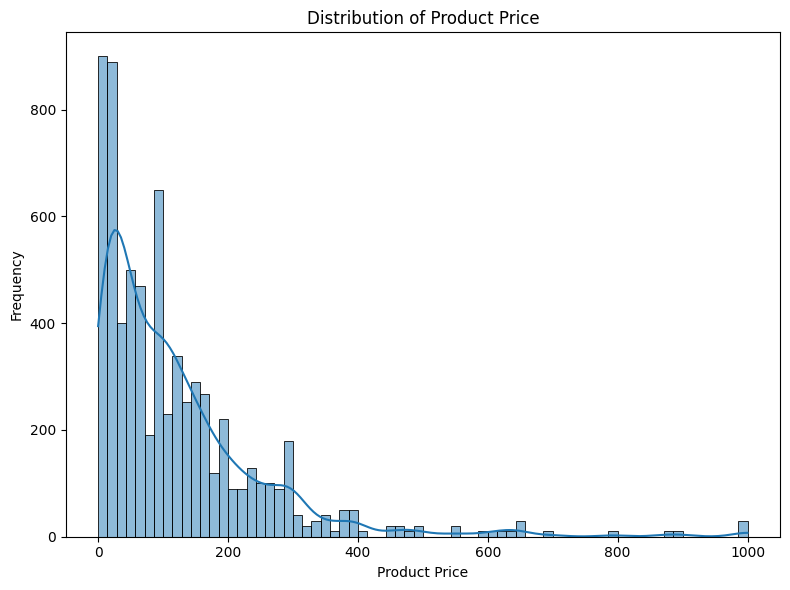

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


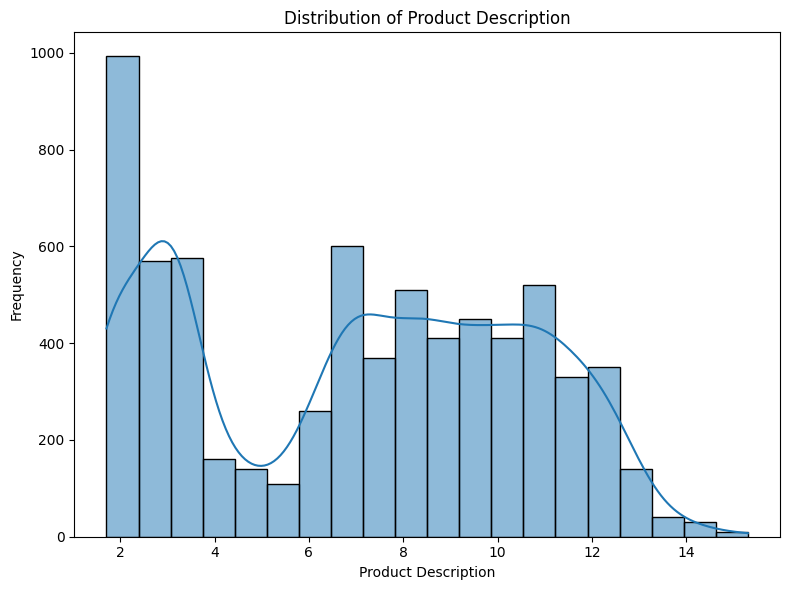

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


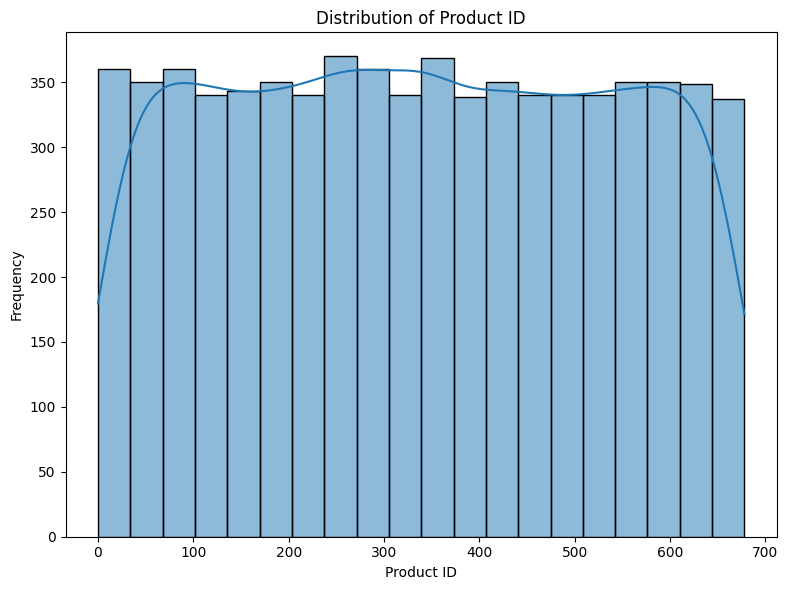

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


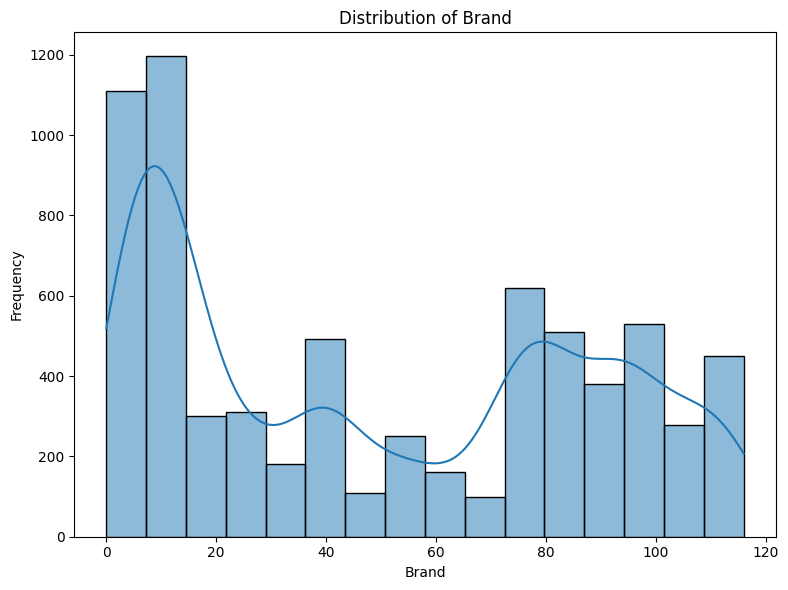

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


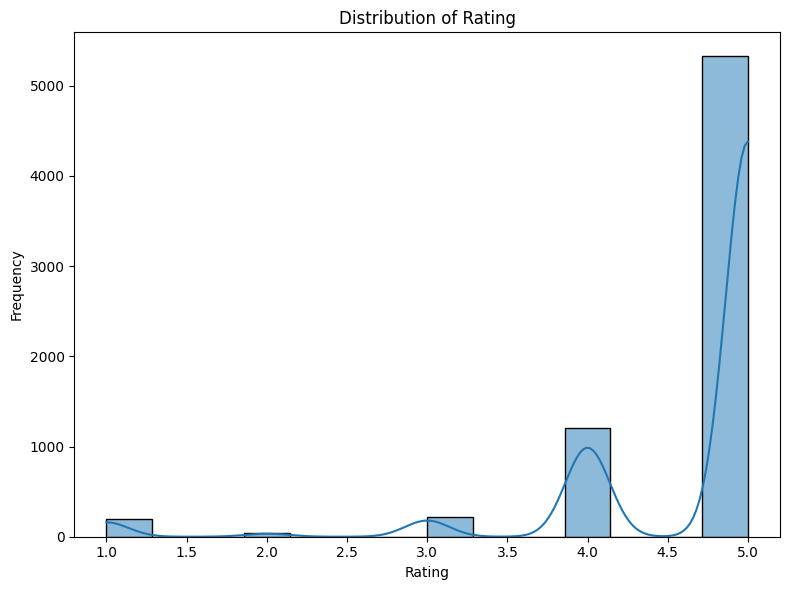

C:\Users\rotes\AppData\Local\Temp\ipykernel_19764\984521591.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True,palette='viridis')


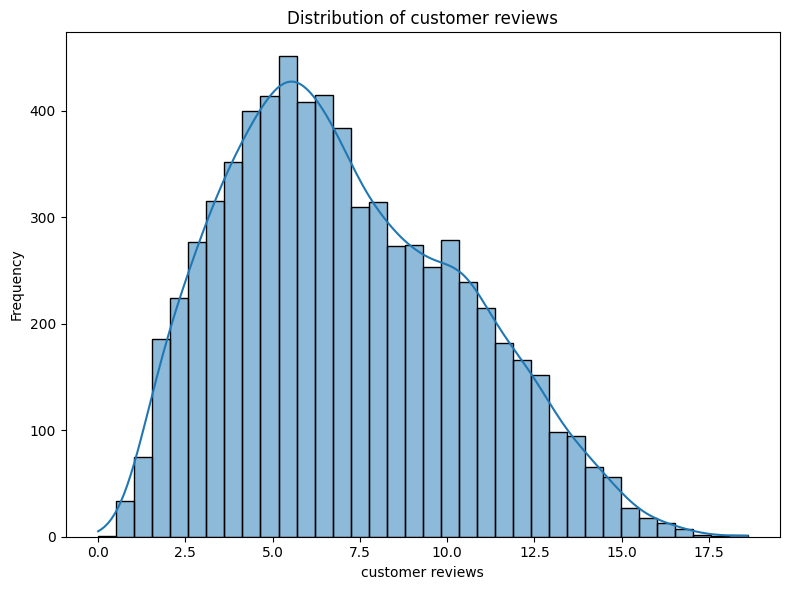

In [10]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True,palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()